In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('./data/04_graph_practice_dataset.csv', encoding='cp949')
df['날짜'] = pd.to_datetime(df['날짜'])
df.head()

,날짜,지역,제품,매출,이익,고객수,카테고리
0,2024-01-31,서울,A,182,34.916660,930.986807,전자
1,2024-02-29,서울,A,131,21.843166,998.727403,전자
2,2024-03-31,서울,A,172,22.114619,1203.880436,전자
3,2024-04-30,서울,A,94,21.636703,491.932862,전자
4,2024-05-31,서울,A,186,20.698511,1835.592633,전자


In [4]:
df2 = df.copy()

In [40]:
month_money= df[['매출','날짜']].groupby('날짜').sum()
month_money['매출']

날짜
2024-01-31    1620
2024-02-29    1594
2024-03-31    1660
2024-04-30    1712
2024-05-31    1773
2024-06-30    1764
2024-07-31    1765
2024-08-31    1657
2024-09-30    1592
2024-10-31    1776
2024-11-30    1495
2024-12-31    1611
Name: 매출, dtype: int64

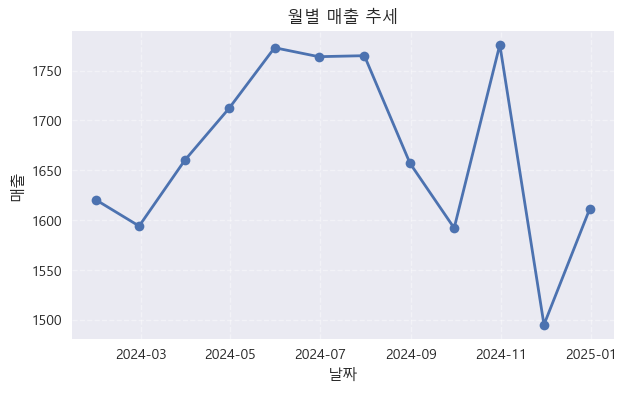

In [30]:
#문제1 월별 전체 매출 추이
plt.figure(figsize=(7,4))
plt.plot(month_money,marker='o',linewidth=2)
plt.title('월별 매출 추세')
plt.xlabel('날짜')
plt.ylabel('매출')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

<Axes: xlabel='날짜', ylabel='매출'>

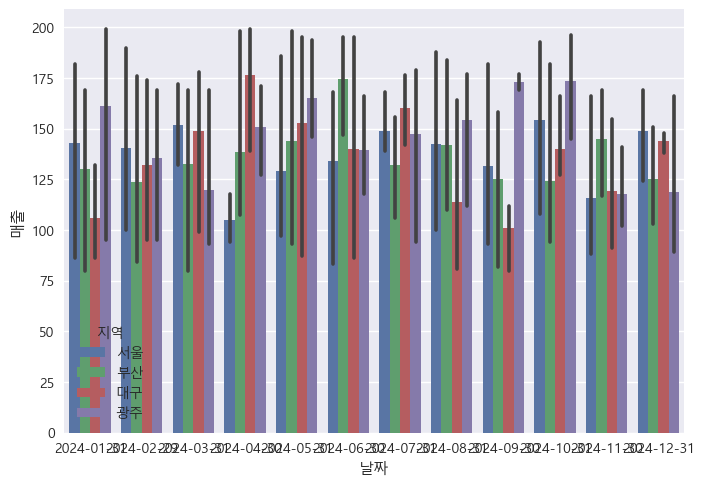

In [88]:
#문제2 지역별 매출 추세 비교
sns.barplot(data=df, x='날짜', y='매출', hue='지역')

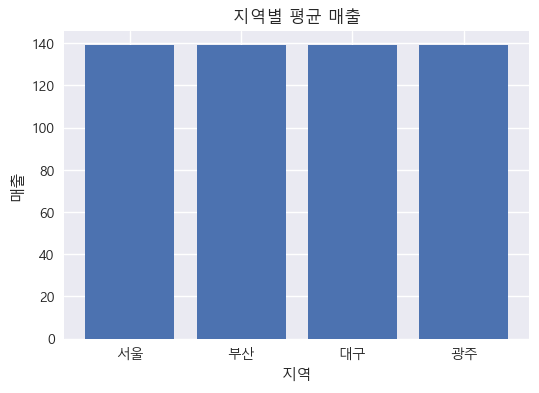

In [63]:
#문제3 지역별 평균 매출
plt.figure(figsize=(6,4))
plt.bar(df['지역'],df['매출'].mean())
plt.title('지역별 평균 매출')
plt.xlabel('지역')
plt.ylabel('매출')
plt.show()

Text(0.5, 1.0, '지역별 제품 평균 매출 비교')

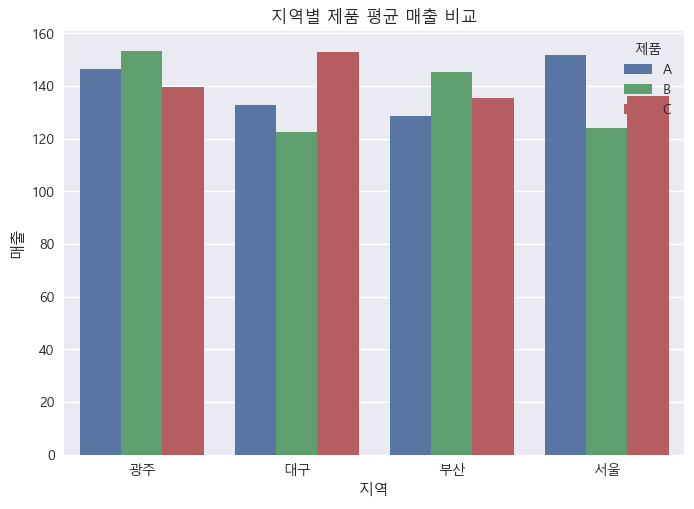

In [96]:
#문제4 지역vs 제품별 매출
df_mean = df.groupby(['지역', '제품'])['매출'].mean().reset_index()
sns.barplot(data=df_mean, x='지역', y='매출', hue='제품')
plt.title('지역별 제품 평균 매출 비교')

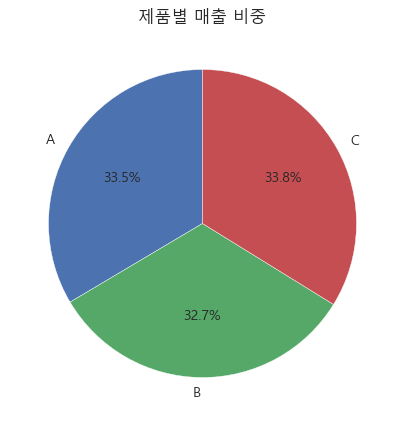

In [103]:
#문제5 제품별 총매출 비중
labels = ['A','B','C']
data = df.groupby('제품')['매출'].sum()
plt.figure(figsize=(5,5))
plt.pie(data, labels=labels, autopct='%.1f%%', startangle=90,
        wedgeprops={'edgecolor': 'white'})
plt.title('제품별 매출 비중')
plt.show()

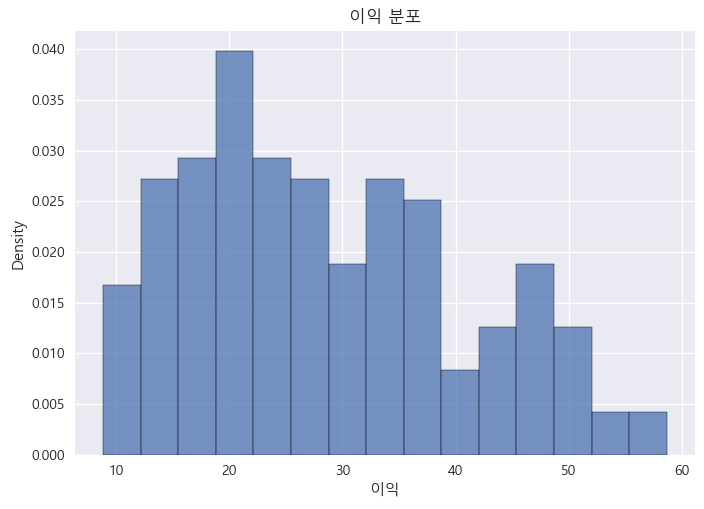

In [108]:
#문제6 이익 분포
plt.figure()
sns.histplot(df['이익'],bins=15,stat='density')
plt.title('이익 분포')
plt.show()

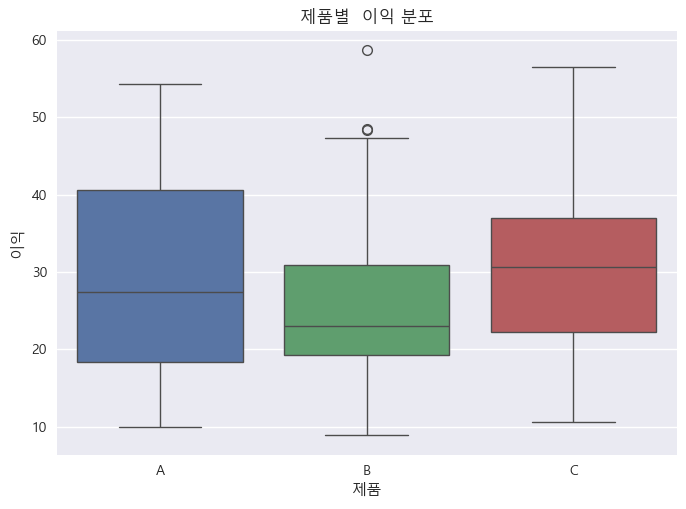

In [8]:
#문제7 제품별 이익 분포 
plt.figure()
sns.boxplot(data = df2 ,x = '제품',y='이익',hue='제품')
plt.title('제품별  이익 분포')
plt.show()

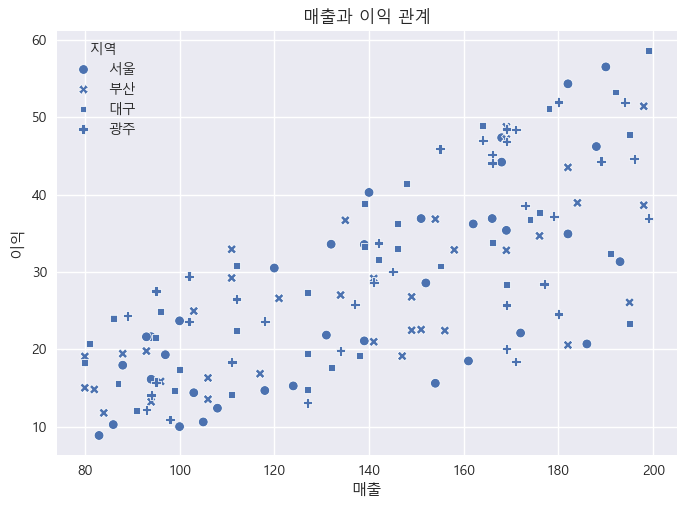

In [10]:
#문제8
plt.figure()
sns.scatterplot(data = df2, x = '매출',y = '이익',style='지역')
plt.title('매출과 이익 관계')
plt.show()

In [29]:
#문제9 지역x제품 매출 Heatmap
df2['평균매출'] = df2.groupby('지역')['매출'].mean()
df2

,날짜,지역,제품,매출,이익,고객수,카테고리,평균매출
0,2024-01-31,서울,A,182,34.916660,930.986807,전자,NaN
1,2024-02-29,서울,A,131,21.843166,998.727403,전자,NaN
2,2024-03-31,서울,A,172,22.114619,1203.880436,전자,NaN
3,2024-04-30,서울,A,94,21.636703,491.932862,전자,NaN
4,2024-05-31,서울,A,186,20.698511,1835.592633,전자,NaN
...,...,...,...,...,...,...,...,...
139,2024-08-31,광주,C,112,26.520788,910.526215,식품,NaN
140,2024-09-30,광주,C,173,38.608450,1574.669220,식품,NaN
141,2024-10-31,광주,C,180,51.980098,1486.336295,식품,NaN
142,2024-11-30,광주,C,102,29.462733,615.409023,식품,NaN


Text(0.5, 1.0, '지역-제품 쳥균 매출 히트맵')

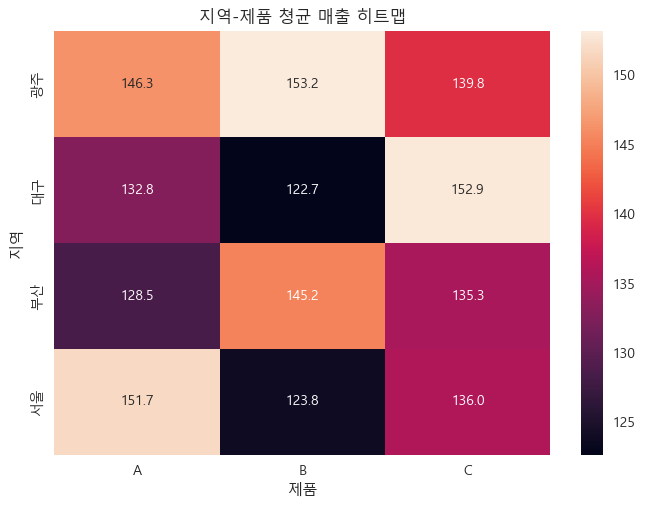

In [38]:
table = df2.pivot_table(index='지역', columns='제품', values='매출', aggfunc='mean')
plt.figure()
sns.heatmap(table, annot=True, fmt=".1f")
plt.title('지역-제품 쳥균 매출 히트맵')

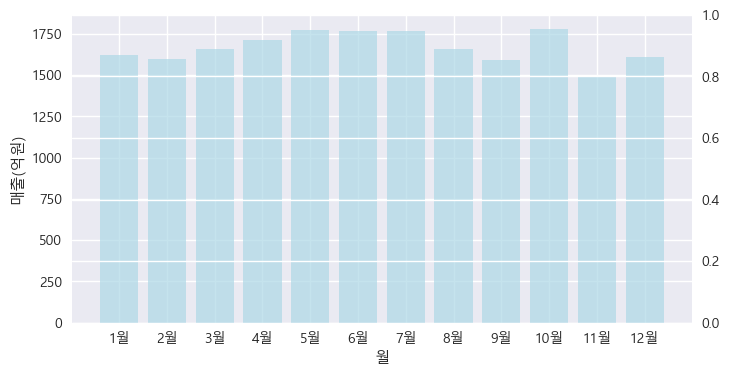

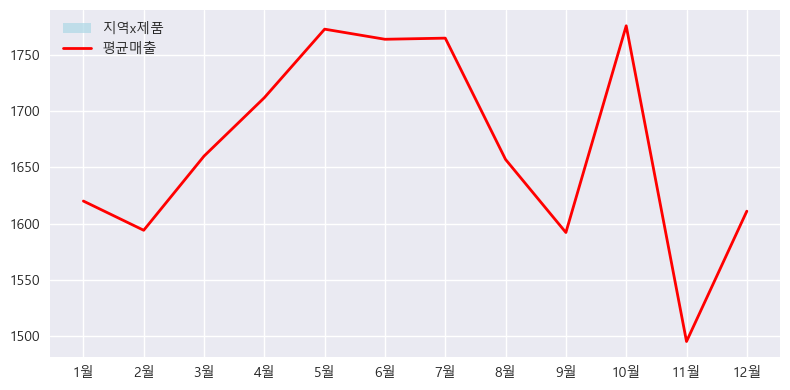

In [57]:
#문제10 매출 고객수
# 왼쪽 축: (막대)
months = ['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월']
fig, ax1 = plt.subplots(figsize=(8,4))
ax1.bar(months, month_money['매출'], color='lightblue', alpha=0.7, label='지역x제품')
ax1.set_ylabel('매출(억원)')
ax1.set_xlabel('월')

# 오른쪽 축: (선)
ax2 = ax1.twinx()
fig, ax2 = plt.subplots(figsize=(8,4))
ax2.plot(months, month_money['매출'], color='red', linewidth=2, label='평균매출')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', frameon=False)

plt.tight_layout()
plt.show()

In [44]:
month_money['매출']

날짜
2024-01-31    1620
2024-02-29    1594
2024-03-31    1660
2024-04-30    1712
2024-05-31    1773
2024-06-30    1764
2024-07-31    1765
2024-08-31    1657
2024-09-30    1592
2024-10-31    1776
2024-11-30    1495
2024-12-31    1611
Name: 매출, dtype: int64